In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn import svm
import pandas as pd
import itertools

In [2]:
collection = io.imread_collection('F:/image processing in python/Image/Landsat/*.tif')

In [3]:
B2 = collection[1]
B3 = collection[2]
B4 = collection[3]

In [4]:
normal4 = (B4 - np.min(B4))/(np.max(B4) - np.min(B4))
normal3 = (B3 - np.min(B3))/(np.max(B3) - np.min(B3))
normal2 = (B2 - np.min(B2))/(np.max(B2) - np.min(B2))

In [5]:
rgb = np.stack([normal4, normal3, normal2], axis=2)

In [6]:
width = collection[0].shape[0]
height = collection[0].shape[1]

In [7]:
width

998

In [8]:
height

998

In [9]:
all_images = io.concatenate_images(collection).transpose()
all_image_reshape = all_images.reshape((height*width, len(collection)))

In [ ]:
all_image_reshape

In [11]:
class_num = 4

In [12]:
sample_num = 5

In [13]:
columns = ['Band{}'.format(i+1) for i in range(len(collection))]
classes_df = pd.DataFrame(columns =columns )

In [14]:
columns

['Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6']

In [15]:
classes_df

,Band1,Band2,Band3,Band4,Band5,Band6


In [16]:
targets = [[i+1]*sample_num for i in range(class_num)]
merged = list(itertools.chain(*targets))
classes_df['Target'] = merged

In [17]:
targets

[[1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [4, 4, 4, 4, 4]]

In [18]:
merged

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]

In [19]:
classes_df

,Band1,Band2,Band3,Band4,Band5,Band6,Target
0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,1
5,NaN,NaN,NaN,NaN,NaN,NaN,2
6,NaN,NaN,NaN,NaN,NaN,NaN,2
7,NaN,NaN,NaN,NaN,NaN,NaN,2
8,NaN,NaN,NaN,NaN,NaN,NaN,2
9,NaN,NaN,NaN,NaN,NaN,NaN,2


In [20]:
i = 0

In [21]:
def mouseclick(event , x , y , flags, param):
    global i
    if event == cv2.EVENT_LBUTTONDOWN:
        if i < class_num * sample_num:
            mylist = []
            for j in collection:
                mylist.append(j[x][y])
            classes_df.iloc[i , 0:len(collection)] = mylist
            i = i+1
            print(classes_df)
        else:
            array = classes_df.values
            X = array[: , 0:len(collection)]
            Y = array[:, len(collection)].astype('int')
            
            clf = svm.SVC(gamma='scale')#Start Classifier
            clf.fit(X,Y)
            pred = clf.predict(all_image_reshape)
            plt.imshow(pred.reshape((height, width)).transpose())
            plt.show()             

   Band1 Band2 Band3 Band4 Band5 Band6  Target
0    -86   191  2250   128  1256   644       1
1    NaN   NaN   NaN   NaN   NaN   NaN       1
2    NaN   NaN   NaN   NaN   NaN   NaN       1
3    NaN   NaN   NaN   NaN   NaN   NaN       1
4    NaN   NaN   NaN   NaN   NaN   NaN       1
5    NaN   NaN   NaN   NaN   NaN   NaN       2
6    NaN   NaN   NaN   NaN   NaN   NaN       2
7    NaN   NaN   NaN   NaN   NaN   NaN       2
8    NaN   NaN   NaN   NaN   NaN   NaN       2
9    NaN   NaN   NaN   NaN   NaN   NaN       2
10   NaN   NaN   NaN   NaN   NaN   NaN       3
11   NaN   NaN   NaN   NaN   NaN   NaN       3
12   NaN   NaN   NaN   NaN   NaN   NaN       3
13   NaN   NaN   NaN   NaN   NaN   NaN       3
14   NaN   NaN   NaN   NaN   NaN   NaN       3
15   NaN   NaN   NaN   NaN   NaN   NaN       4
16   NaN   NaN   NaN   NaN   NaN   NaN       4
17   NaN   NaN   NaN   NaN   NaN   NaN       4
18   NaN   NaN   NaN   NaN   NaN   NaN       4
19   NaN   NaN   NaN   NaN   NaN   NaN       4
   Band1 Band

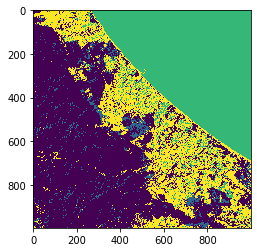

In [ ]:
cv2.namedWindow('mouseClick', cv2.WINDOW_NORMAL)
cv2.setMouseCallback('mouseClick', mouseclick)

while True:
    cv2.imshow('mouseClick', rgb)
    if cv2.waitKey(20) == 27:
        break
        
cv2.destroyAllWindow()